In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('dataset/preprocessed_datas_kaggle_outlier_removed.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   class          25192 non-null  float64
 1   count          25192 non-null  float64
 2   dst_bytes      25192 non-null  float64
 3   protocol_type  25192 non-null  float64
 4   service        25192 non-null  float64
 5   src_bytes      25192 non-null  float64
 6   srv_count      25192 non-null  float64
dtypes: float64(7)
memory usage: 1.3 MB


In [4]:
df.isna().sum()

class            0
count            0
dst_bytes        0
protocol_type    0
service          0
src_bytes        0
srv_count        0
dtype: int64

In [5]:
df.head()

,class,count,dst_bytes,protocol_type,service,src_bytes,srv_count
0,1.0,-0.720244,-0.672625,1.0,19.0,1.415223,-0.354628
1,1.0,-0.624317,-0.672625,2.0,41.0,-0.113860,-0.368427
2,0.0,0.334947,-0.672625,1.0,46.0,-0.760950,-0.299430
3,1.0,-0.694082,1.867994,1.0,22.0,0.267303,-0.313230
4,1.0,-0.476067,0.132324,1.0,22.0,0.121043,0.059355


In [6]:
df['class'].unique()

array([1., 0.])

<Axes: xlabel='class', ylabel='count'>

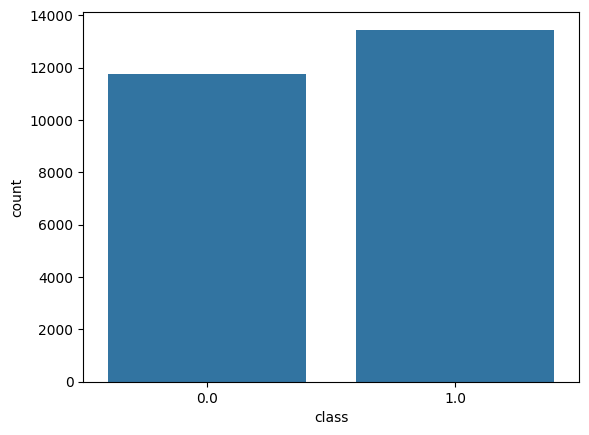

In [7]:
import seaborn as sns
sns.countplot(x=df['class'])

In [8]:
print('Class distribution Training set:')
print(df['class'].value_counts())

Class distribution Training set:
class
1.0    13449
0.0    11743
Name: count, dtype: int64


In [9]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Example dataset (replace with your own)
# X = df.drop('class', axis=1)  # Features
# y = df['class']               # Target variable

# # Split dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Initialize the RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=100, random_state=42)


In [10]:
# # Train the model
# rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# # Predict on the test set
# y_pred = rf.predict(X_test)

# # Evaluate the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

Random Forest Accuracy: 99.33%


In [12]:
# import pickle
# # Save the encoder to a .pkl file
# with open('model/random_forest_classifier.pkl', 'wb') as file:
#     pickle.dump(rf, file)

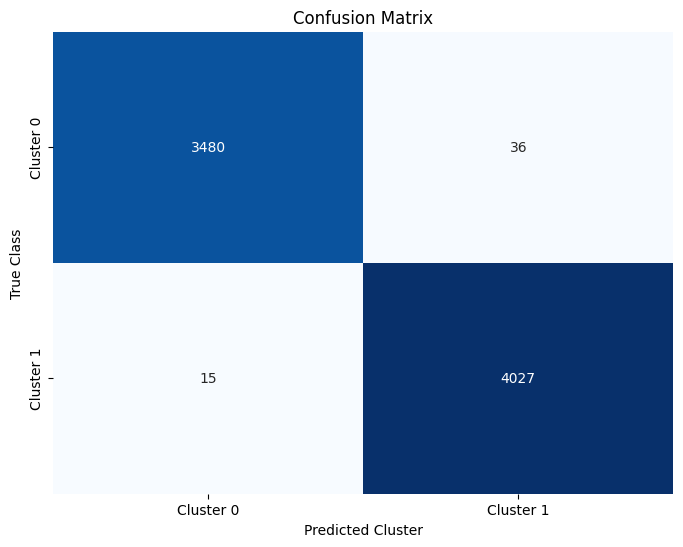

In [13]:
# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Create confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
#             xticklabels=['Cluster 0', 'Cluster 1'],
#             yticklabels=['Cluster 0', 'Cluster 1'])
# plt.xlabel('Predicted Cluster')
# plt.ylabel('True Class')
# plt.title('Confusion Matrix')
# plt.show()

In [14]:
df2 = df.copy()
# removing feature class for training
df.pop('class')


0        1.0
1        1.0
2        0.0
3        1.0
4        1.0
        ... 
25187    0.0
25188    0.0
25189    0.0
25190    0.0
25191    0.0
Name: class, Length: 25192, dtype: float64

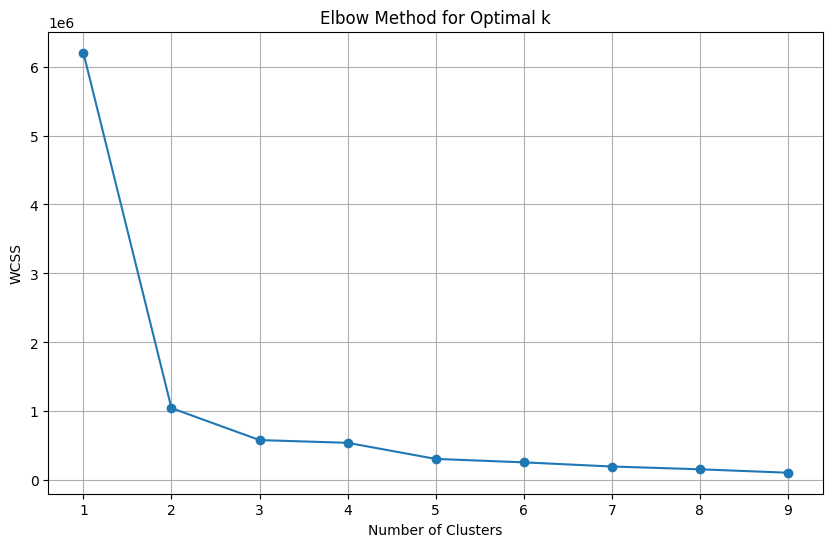

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Range of cluster numbers to test
k_range = range(1, 10)  # Test from 1 to 10 clusters

# Calculate WCSS for each number of clusters
wcss = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)  # WCSS is the sum of squared distances to the nearest centroid

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [16]:

# Initialize KMeans with the number of clusters you want (e.g., 2 clusters)
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the KMeans model and predict clusters
df2['cluster'] = kmeans.fit_predict(df)

In [17]:
cluster_counts = df2.groupby('cluster').size()
cluster_counts

cluster
0    16193
1     8999
dtype: int64

In [18]:
class_count = df2.groupby('class').size()
class_count

class
0.0    11743
1.0    13449
dtype: int64

In [19]:
# Analyze the distribution of classes in each cluster
cluster_label_distribution = df2.groupby('cluster')['class'].value_counts()
print(cluster_label_distribution)

cluster  class
0        1.0      10915
         0.0       5278
1        0.0       6465
         1.0       2534
Name: count, dtype: int64


In [20]:
# Calculate the total number of samples in each cluster
cluster_totals = df2['cluster'].value_counts()

# Calculate the percentage of each class within each cluster
class_distribution_percentage = df2.groupby(['cluster', 'class']).size().unstack(fill_value=0)
class_distribution_percentage = class_distribution_percentage.divide(cluster_totals, axis=0) * 100

print(class_distribution_percentage)


class          0.0        1.0
cluster                      
0        32.594331  67.405669
1        71.841316  28.158684


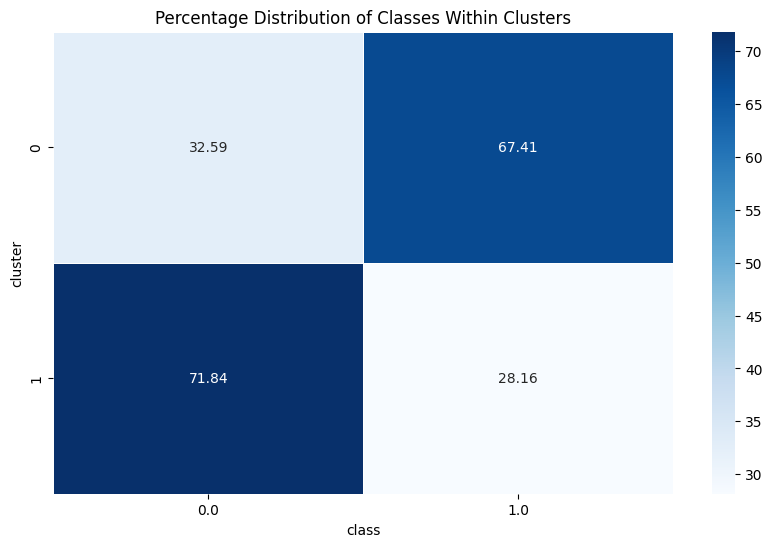

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the percentage distribution of classes within each cluster
plt.figure(figsize=(10, 6))
sns.heatmap(class_distribution_percentage, annot=True, cmap='Blues', linewidths=0.5, fmt=".2f")
plt.title('Percentage Distribution of Classes Within Clusters')
plt.show()


# the above figure shows cluster 1 is most likely represent data of label 0 i.e anamoly
# the above figure shows cluster 0 is most likely represent data of label 1 i.e normal

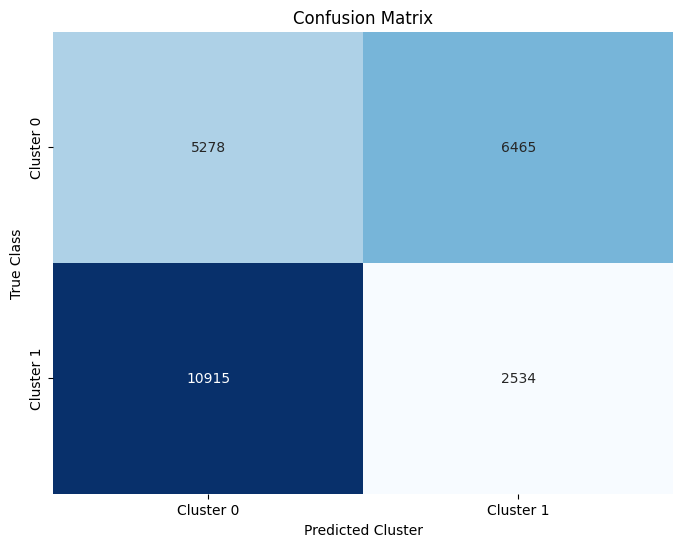

In [22]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(df2['class'], df2['cluster'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Cluster 0', 'Cluster 1'],
            yticklabels=['Cluster 0', 'Cluster 1'])
plt.xlabel('Predicted Cluster')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

confusion matrix is in form as cluster 1 actually represet label 0 data
[FN, TN]
[TP, FP]

In [23]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(df, df2['cluster'])
silhouette_avg

np.float64(0.7557300925319278)

In [24]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin index
db_index = davies_bouldin_score(df, df2['cluster'])
db_index

np.float64(0.3596576324274295)

In [25]:
import pickle
# Save the encoder to a .pkl file
with open('model/kmean.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

In [26]:
from sklearn.mixture import GaussianMixture
gaussian_clustering = GaussianMixture(n_components=2)

# Fit the model and predict clusters
df2['cluster_gauss'] = gaussian_clustering.fit_predict(df)

In [27]:
cluster_counts = df2.groupby('cluster_gauss').size()
cluster_counts

cluster_gauss
0    15163
1    10029
dtype: int64

In [28]:
class_count = df2.groupby('class').size()
class_count

class
0.0    11743
1.0    13449
dtype: int64

In [29]:

# Analyze the distribution of classes in each cluster
cluster_label_distribution = df2.groupby('cluster_gauss')['class'].value_counts()
print(cluster_label_distribution)


cluster_gauss  class
0              1.0      12816
               0.0       2347
1              0.0       9396
               1.0        633
Name: count, dtype: int64


In [30]:
# Calculate the total number of samples in each cluster
cluster_totals = df2['cluster_gauss'].value_counts()

# Calculate the percentage of each class within each cluster
class_distribution_percentage = df2.groupby(['cluster_gauss', 'class']).size().unstack(fill_value=0)
class_distribution_percentage = class_distribution_percentage.divide(cluster_totals, axis=0) * 100

print(class_distribution_percentage)


class                0.0        1.0
cluster_gauss                      
0              15.478467  84.521533
1              93.688304   6.311696


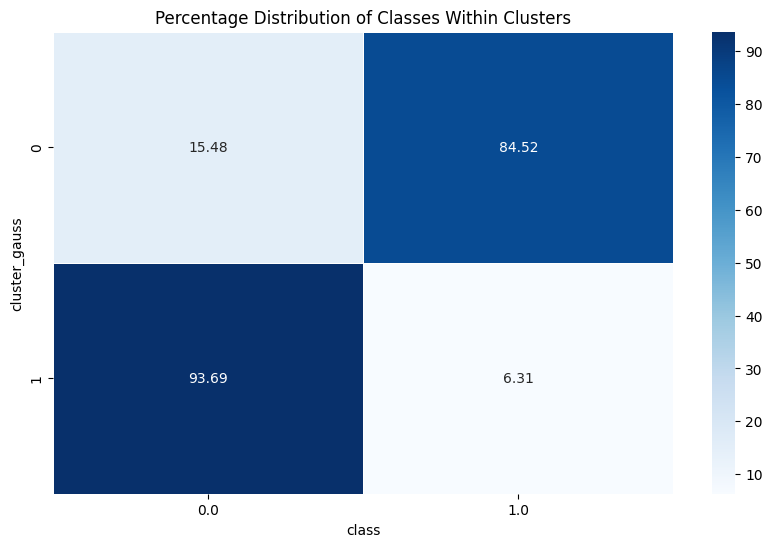

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the percentage distribution of classes within each cluster
plt.figure(figsize=(10, 6))
sns.heatmap(class_distribution_percentage, annot=True, cmap='Blues', linewidths=0.5, fmt=".2f")
plt.title('Percentage Distribution of Classes Within Clusters')
plt.show()


# the above figure shows cluster 1 is most likely represent data of label 0 i.e anamoly
# the above figure shows cluster 0 is most likely represent data of label 1 i.e normal

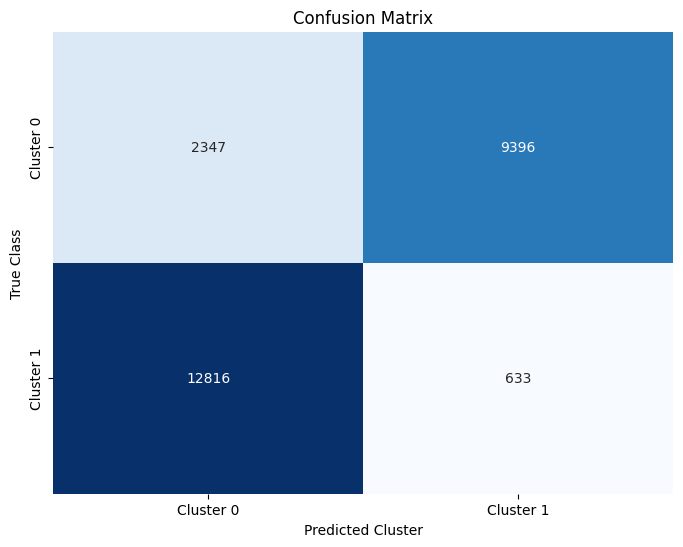

In [32]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(df2['class'], df2['cluster_gauss'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Cluster 0', 'Cluster 1'],
            yticklabels=['Cluster 0', 'Cluster 1'])
plt.xlabel('Predicted Cluster')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

confusion matrix is in form as cluster 1 actually represent label 0 data
[FN, TN]
[TP, FP]

In [33]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(df, df2['cluster_gauss'])
silhouette_avg

np.float64(0.22305837622787406)

In [34]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin index
db_index = davies_bouldin_score(df, df2['cluster_gauss'])
db_index


np.float64(2.231435197865248)

In [35]:
import pickle
# Save the encoder to a .pkl file
with open('model/gaussian.pkl', 'wb') as file:
    pickle.dump(gaussian_clustering, file)